True

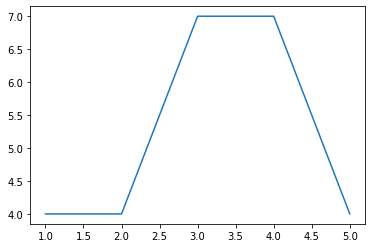

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd


x = [1,2,3,4,5]
y = np.round(np.random.random(5) * 10)

plot = plt.plot(x,y)

type(plot[0]) == matplotlib.lines.Line2D

In [2]:
# So it seems that I cannot access the raw data easily underneath a matplotlib
# That's fine, I'll just have a datastory class that holds the raw data + plot together easily

In [7]:
# import matplotlib as mpl

# flist = mpl.font_manager.get_fontconfig_fonts()
# names = [mpl.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
# names

In [6]:
# [f.name for f in mpl.font_manager.fontManager.ttflist]

In [5]:
# font_dirs = ['extra_fonts/']
# font_manager = mpl.font_manager
# font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
# print('Font Files: {}'.format(font_files))
# font_list = font_manager.createFontList(font_files)
# print('\nFont List: {}'.format(font_list))
# font_manager.fontManager.ttflist.extend(font_list)

# mpl.rcParams['font.family'] = 'STIXSizeOneSym'

# print('\nFont Fam: {}'.format(mpl.rcParams['font.family']))

# mpl.font_manager._rebuild()

# flist = mpl.font_manager.get_fontconfig_fonts()

# print('Flist: {}'.format(flist))

# names = [mpl.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
# names

In [77]:
class data_story():
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    
    ##############################
    ### BASIC INIT + STYLING #####
    ##############################
    
    def __init__(self):
        
        # TODO: Once I add plotly/seaborn integrations, add a backend parameter
        self.plotter = 'matplot'
        
        # Set fonts, which have to be done before creating plots for some reason in mpl
        self.default_font()
        
        # Only handles one plot at a time
        f, ax = plt.subplots(1)
        f.set_size_inches(18.5, 10.5)
        
        # Containers for X & Y data & names for easier access
        self.x_data = []
        self.y_data = []
        self.chart_name_list = []
        self.chart_type_list = []
        self.fig = f
        self.chart = ax
        
        # Set Style
        self.default_style()
        self.color_list = ['#3F784C','#003D73','#C05640','#CAC4CE']
    
    def default_font(self):
        
        SMALL_SIZE = 16
        MEDIUM_SIZE = 22
        BIGGER_SIZE = 26
        
        # Font Manager is a serious pain. 
        mpl.rcParams['font.family'] = 'Futura'

        plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    def default_style(self):
        
        # Remove box lines and ticks
        self.chart.spines['top'].set_visible(False)
        self.chart.spines['right'].set_visible(False)
        self.chart.tick_params(axis=u'both', which=u'both',length=0)
        self.chart.set_title('TEST test')
        

    def display_y_values(self, buffer=None, hide_ticks=True, above=True, top=True, name=None):
        x,y,chart_type = self.pull_data(name)
        
        if not buffer:
            buffer = (sum(y)/len(y))/100
        for i in range(len(x)):
            if top:
                n_y = y[i]
            else:
                ## TODO: Determine if this always works, or if it needs to be in relation to xlim
                n_y = 0
                        
            if above:
                n_y += buffer
            else:
                ## TODO: Figure out how to subtract out the height of the text as well!
                n_y -= buffer
                
            self.chart.text(x[i],n_y,y[i])
        
        if hide_ticks:
            self.chart.set_yticks([])
            self.chart.spines['left'].set_visible(False)
        
    def display_x_values(self, buffer=None, hide_ticks=True, above=True, top=True, name=None):
        x,y,chart_type = self.pull_data(name)
        
        if not buffer:
            buffer = (sum(y)/len(y))/100
        for i in range(len(x)):
            if top:
                n_y = y[i]
            else:
                ## TODO: Determine if this always works, or if it needs to be in relation to xlim
                n_y = 0
                        
            if above:
                n_y += buffer
            else:
                ## TODO: Figure out how to subtract out the height of the text as well!
                n_y -= buffer
                
            ## TODO: Center X vals by subtracting string length. Add flag if it runs into next bar
            self.chart.text(x[i],n_y,x[i])
        
        if hide_ticks:
            self.chart.set_xticks([])
            self.chart.spines['bottom'].set_visible(False)
            
    ##############################
    ### CHART GENERATE FUNCS #####
    ##############################    
    
    # Generate Line Graph
    def line(self,x,y, name=None, color=None):
         ## TODO, add parameters for each potential helper function
            
        self.x_data.append(x)
        self.y_data.append(y)
        
        if name:
            chart_name = name
            self.chart_name_list.append(name)
        else:
            chart_name = 'unnamed_{}'.format(len(self.chart_name_list)+1)
            
        self.chart_name_list.append(chart_name)
        self.chart_type_list.append('line')
        

        self.chart.plot(x,y)
       
    # Generate Line Graph
    def bar(self,x,y, name=None, color=None):
        
        if not color:
            c =  self.color_list[len(self.chart_name_list)]
        else:
            c = color
        self.chart.bar(x,y,color=c)
        
        self.x_data.append(x)
        self.y_data.append(y)
        
        if name:
            chart_name = name
            self.chart_name_list.append(name)
        else:
            chart_name = 'unnamed_{}'.format(len(self.chart_name_list)+1)
            
        self.chart_name_list.append(chart_name)
        self.chart_type_list.append('bar')
      
    # Generate Line Graph
    def pie(self,slices,perc, name=None):
        self.x_data.append(slices)
        self.y_data.append(perc)
        
        if name:
            chart_name = name
            self.chart_name_list.append(name)
        else:
            chart_name = 'unnamed_{}'.format(len(self.chart_name_list)+1)
            
        self.chart_name_list.append(chart_name)
        self.chart_type_list.append('pie')
            
        self.chart.pie(perc,labels=slices)
    
    ##############################
    ####### ANNOTATIONS ##########
    ##############################
    
    ## Highlight
    def highlight(self, points, x_provided=True, name=None, color='#FFB20F'):
        
        # points        the data points to highlight
        # x_provided    if the "points" refers to X values or not
        # name          name of dataset
        # color         color of highlight (default orange yellow)
        
        
        # Pull X, Y data and chart type
        x,y,chart_type = self.pull_data(name)
        
        
        
        ## Change points into list for easy usage
        if not isinstance(points, list):
            points = [points]
        
        
        # If x vals provided:
        if x_provided:
            hl_x = points
            hl_y = [y[x.index(i)] for i in points]
        # If y vals provided
        else:
            hl_y = points
            hl_x = [x[y.index(i)] for i in points]
            
            
        
        bottom = self.chart.get_ylim()[0]
        
        # Iterate through all points to highlight
        for i in range(len(points)):
            x_val = hl_x[i]
            y_val = hl_y[i]
            
            # If X values are categorical, find numerical base
            if isinstance(x_val,str):
                x_center = x.index(x_val)
            else:
                x_center = x_val
            
            # If highlighting bar chart...
            if chart_type == 'bar':
                
                # Add colored rectangle over bar value
                width = self.chart.patches[i].get_width()
                bottom_left = (x_center-width/2,bottom)
                height = y_val-bottom
                rect = mpl.patches.Rectangle(xy=bottom_left,width=width, height=height,color=color)
                self.chart.add_patch(rect)
                
            # If highlighting a line chart...
            elif chart_type == 'line':
                
                # Circle each point
                
                ## TODO: How to handle if multiple points are next to each other or not
                ## A flag that says to connect the points?
                continue
            
            elif chart_type == 'pie':
                continue
                
                
    
    ## TODO: Label
    
    ## TODO: Bracket
    
    ## TODO: Delineate
    
    ## TODO: Explode (maybe)
    
    
    ##############################
    ########### GETTERS ##########
    ##############################   
    
    # Return X Data
    def get_x_data(self, name=None):
        
        # If a specific dataset is not called out...
        if not name:
            
            # If there is only one dataset, return it
            # Else return all
            if len(self.x_data) == 1:
                return(self.x_data[0])
            else:
                return(self.x_data)
        
        else:
            i = self.chart_name_list.index(name)
            return(self.x_data[i])
        
    # Return Y Data
    def get_y_data(self, name=None):
        
        # If a specific dataset is not called out...
        if not name:
            
            # If there is only one dataset, return it
            # Else return all
            if len(self.y_data) == 1:
                return(self.y_data[0])
            else:
                return(self.y_data)
        
        else:
            i = self.chart_name_list.index(name)
            return(self.y_data[i])
        
    def get_data(self, name=None):
        return(self.get_x_data(name=name),self.get_y_data(name=name))
    
    def get_data_names(self):
        return(self.chart_name_list)
    
    def get_fonts_available(self):
        return([f.name for f in mpl.font_manager.fontManager.ttflist])
    
    def show_fonts_available(self):
        import warnings
        warnings.filterwarnings("ignore")
        
        # Get Fonts 
        fonts = sorted([f.name for f in mpl.font_manager.fontManager.ttflist], reverse=True)
 
        # Extend plot to fit all the fonts
        plt.gcf().set_size_inches(5, len(fonts)/3)
        plt.plot([0,0],[0,len(fonts)])
        plt.xlim(left=0)
        plt.gca().axis('off')
        plt.title('Fonts Available')
        
        # Write the name + the style
        for i in range(len(fonts)): 
            plt.text(0,i,'{}:'.format(fonts[i]), fontdict={'size':12})
            plt.text(0.05,i,fonts[i], fontdict={'family':fonts[i], 'size':12})
        plt.show()
    
    ##############################
    ####### MISC. HELPERS ########
    ############################## 
    
    def pull_data(self, name):
        num_datasets = len(self.chart_name_list)
        if num_datasets != 1:
            if num_datasets == 0:
                raise ValueError("No datasets to highlight")
            elif not name:
                raise ValueError("""Please specify name of dataset you would like to highlight. 
                To find out the name of the imported datasets, use .get_data_names()""")
            else:
                chart_name = name
        else:
            chart_name = self.chart_name_list[0]
               
        # Pull Data
        x,y = self.get_data(name=chart_name)
        chart_type = self.chart_type_list[self.chart_name_list.index(chart_name)]
        
        return(x,y,chart_type)
        
    def show(self):
        import matplotlib as mpl
        plt.show()
                

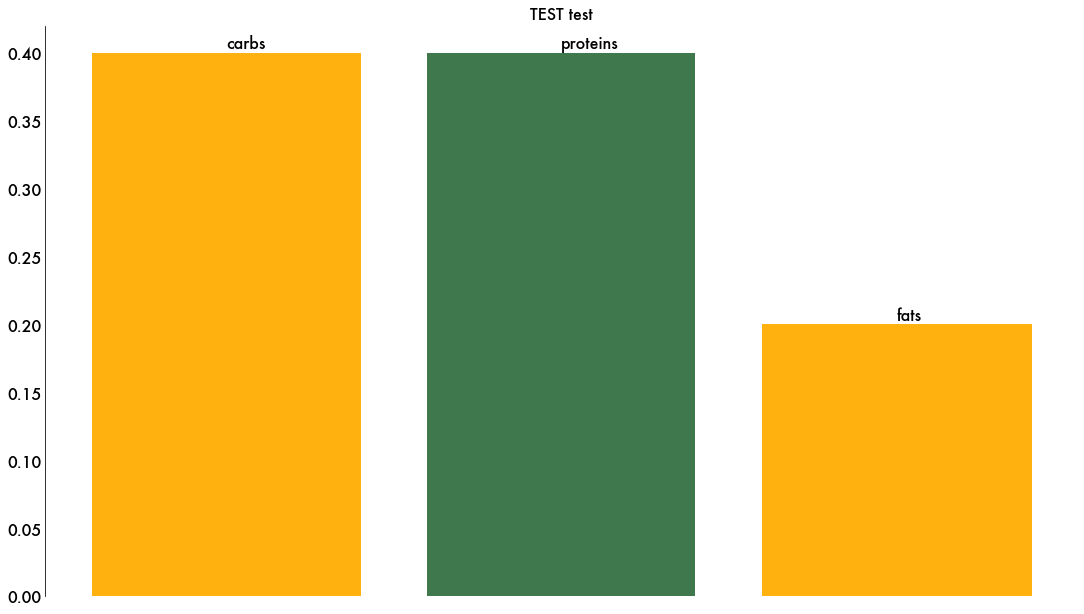

In [80]:
d = data_story()
d.bar(x=['carbs','proteins','fats'],y=[0.4,0.4,0.2])
d.highlight(['fats'])
d.display_x_values()

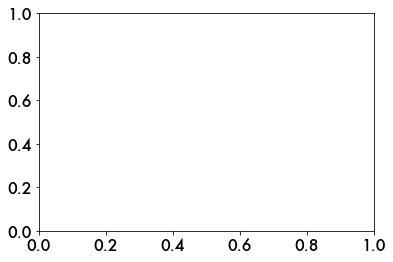

In [63]:
f,a = plt.subplots(1)

In [306]:
a.set_yticks([])

[]

In [324]:
[1,2,3].pop()

3